<a href="https://colab.research.google.com/github/Muskanateeq/ML-Based-Car-Price-Prediction-Model/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv('/content/car_data.csv')
df.dtypes

,0
User ID,int64
Gender,object
Age,int64
AnnualSalary,int64
Purchased,int64


In [ ]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
df = df.rename(columns={'Purchased': 'target'})

In [ ]:
print(df['target'].unique())

[0 1]


In [ ]:
df.drop('User ID', axis=1, inplace=True)

In [ ]:
# prompt: drop multiple columns from df

# columns_to_drop = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']  # Replace with your actual column names
# df.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
df.head()

,Gender,Age,AnnualSalary,target
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [ ]:
df.shape

(1000, 4)

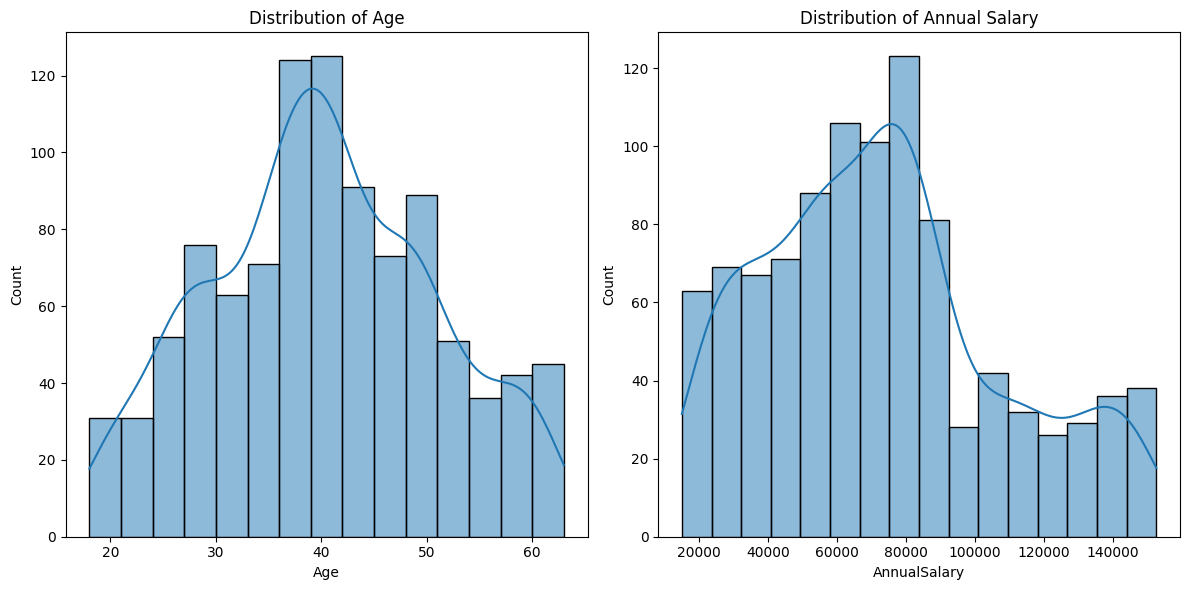

In [ ]:
# prompt: plot distribution for age and annualSalary

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['AnnualSalary'], kde=True)
plt.title('Distribution of Annual Salary')

plt.tight_layout()
plt.show()

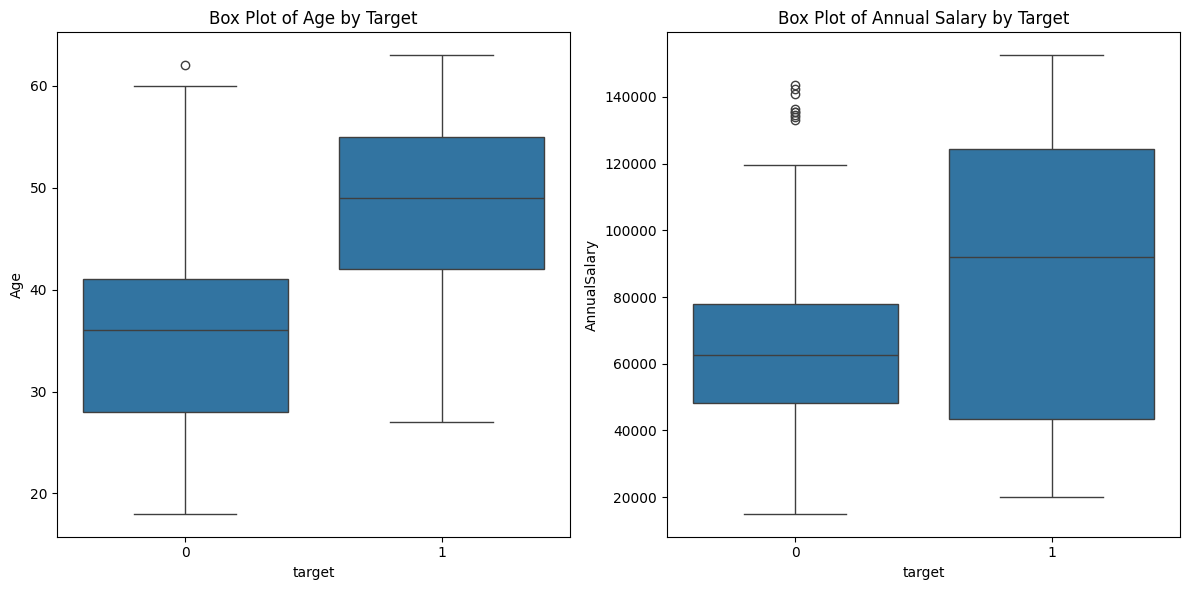

In [ ]:
# prompt: box plot for both

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='target', y='Age', data=df)
plt.title('Box Plot of Age by Target')

plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='AnnualSalary', data=df)
plt.title('Box Plot of Annual Salary by Target')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: remove outliers from annualsalary where target is 0

# Identify outliers in AnnualSalary for target == 0
target_0_df = df[df['target'] == 0]
Q1 = target_0_df['AnnualSalary'].quantile(0.25)
Q3 = target_0_df['AnnualSalary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[~((df['target'] == 0) & ((df['AnnualSalary'] < lower_bound) | (df['AnnualSalary'] > upper_bound)))]

In [ ]:
# prompt: remove outliers from age where target is 0

# Identify outliers in Age for target == 0
target_0_df = df[df['target'] == 0]
Q1 = target_0_df['Age'].quantile(0.25)
Q3 = target_0_df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[~((df['target'] == 0) & ((df['Age'] < lower_bound) | (df['Age'] > upper_bound)))]

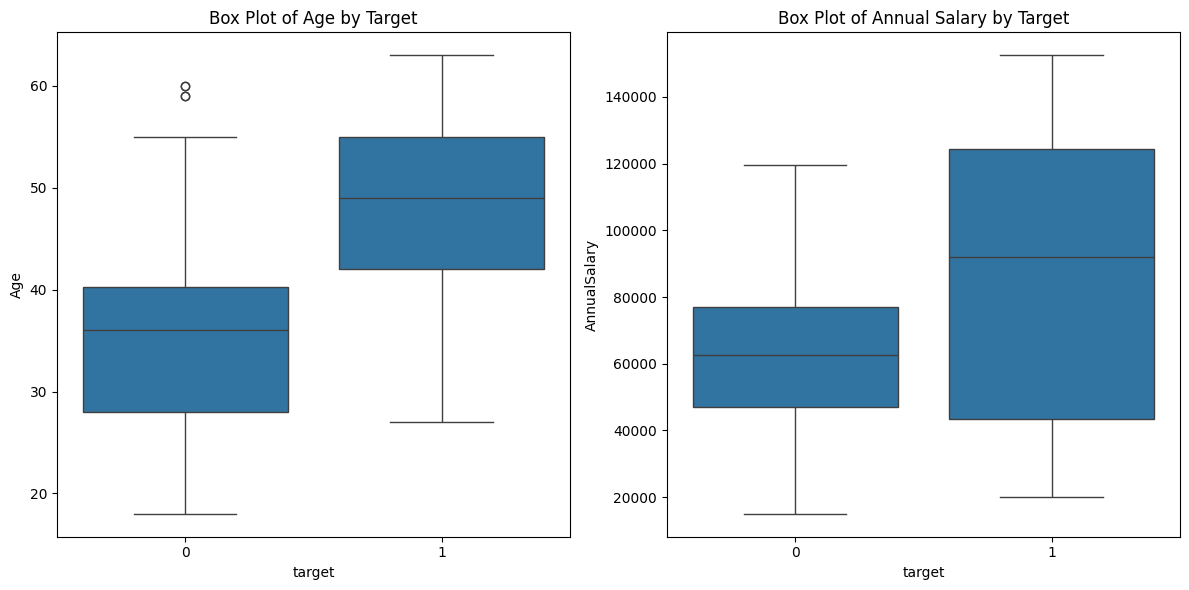

In [ ]:
# prompt: box plot for both

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='target', y='Age', data=df)
plt.title('Box Plot of Age by Target')

plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='AnnualSalary', data=df)
plt.title('Box Plot of Annual Salary by Target')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,Gender,Age,AnnualSalary
640,Male,37,144000
945,Female,48,138000
577,Female,58,23000
933,Female,34,52500
408,Male,25,80000


In [ ]:
y_train.head()

,target
640,1
945,1
577,1
933,0
408,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the preprocessor (ColumnTransformer)
categorical_cols = X_train.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X_train.select_dtypes(exclude=['object']).columns.tolist()),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols.tolist()),
    ])

# Fit and transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
y_test

,target
215,0
333,0
506,1
311,1
88,0
...,...
587,0
433,0
702,0
988,1


In [ ]:
# prompt: import decisiontree

from sklearn.tree import DecisionTreeClassifier



In [ ]:
model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

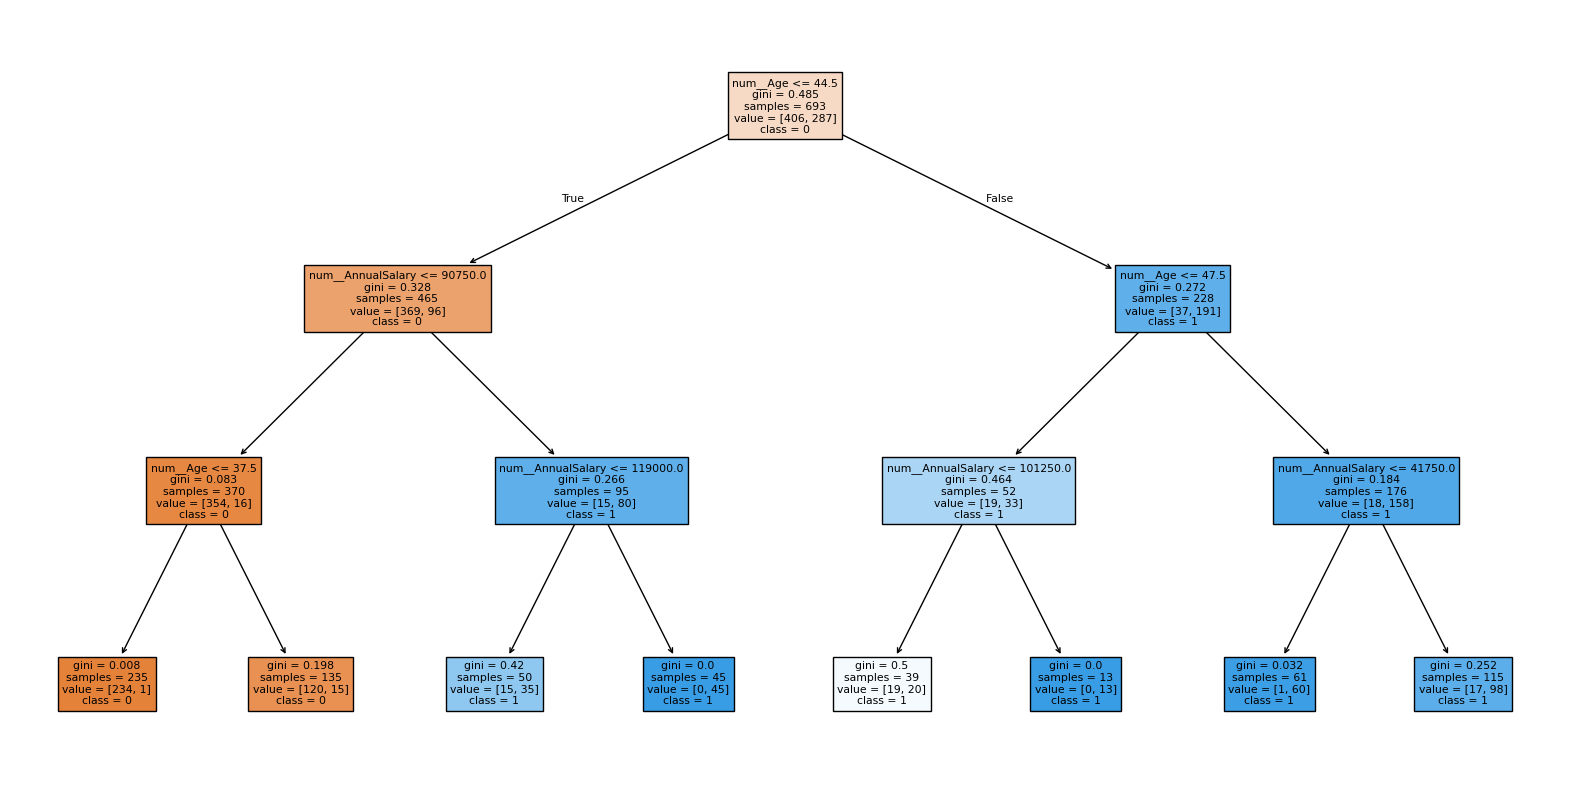

In [ ]:
# prompt: show decision tree of model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get feature names after OneHotEncoding
feature_names = preprocessor.get_feature_names_out()

# Plot the decision tree with the correct feature names
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, class_names=['0', '1'], filled=True)
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
y_test

,target
215,0
333,0
506,1
311,1
88,0
...,...
587,0
433,0
702,0
988,1


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9292929292929293


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       182
           1       0.89      0.94      0.91       115

    accuracy                           0.93       297
   macro avg       0.92      0.93      0.93       297
weighted avg       0.93      0.93      0.93       297

[[168  14]
 [  7 108]]


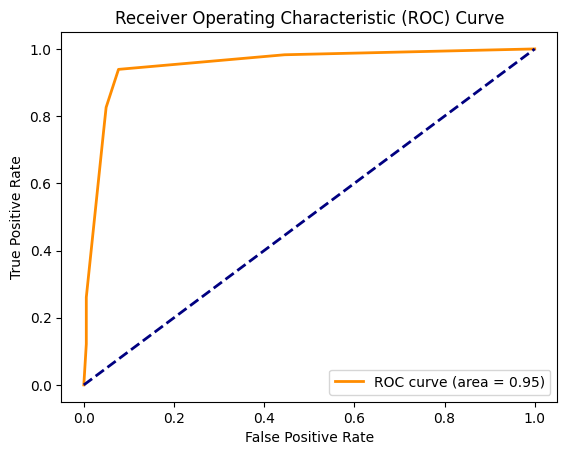

In [ ]:
# prompt: roc curve

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# prompt: test model with my data for single sample

# Assuming you have a new sample data as a dictionary
new_sample = {'Gender': 'Male', 'Age': 10, 'AnnualSalary': 95000}

# Convert the new sample to a DataFrame
new_sample_df = pd.DataFrame([new_sample])

# Preprocess the new sample using the same preprocessor
new_sample_processed = preprocessor.transform(new_sample_df)

# Make a prediction for the new sample
prediction = model.predict(new_sample_processed)

# You can also get the predicted probability if needed
predicted_probability = model.predict_proba(new_sample_processed)
print(f"Predicted probability for class 0 and 1: {predicted_probability[0]}")

# Print the prediction (0 or 1)
print(f"Prediction for the new sample: {prediction[0]}")

Predicted probability for class 0 and 1: [0.3 0.7]
Prediction for the new sample: 1


In [ ]:
# Assuming you have a new sample data as a dictionary
new_sample = {'Gender': 'Male', 'Age': 55, 'AnnualSalary': 50000}

# Convert the new sample to a DataFrame
new_sample_df = pd.DataFrame([new_sample])

# Preprocess the new sample using the same preprocessor
new_sample_processed = preprocessor.transform(new_sample_df)

# Make a prediction for the new sample
prediction = model.predict(new_sample_processed)

# You can also get the predicted probability if needed
predicted_probability = model.predict_proba(new_sample_processed)
print(f"Predicted probability for class 0 and 1: {predicted_probability[0]}")

# Print the prediction (0 or 1)
print(f"Prediction for the new sample: {prediction[0]}")

Predicted probability for class 0 and 1: [0.14782609 0.85217391]
Prediction for the new sample: 1


In [ ]:
def predict (gender, age, salary):
  new_sample = {'Gender': gender, 'Age': age, 'AnnualSalary': salary}

  # Convert the new sample to a DataFrame
  new_sample_df = pd.DataFrame([new_sample])

  # Preprocess the new sample using the same preprocessor
  new_sample_processed = preprocessor.transform(new_sample_df)

  # Make a prediction for the new sample
  prediction = model.predict(new_sample_processed)
  if prediction[0] == 0:
    return "Not Purchased"
  else:
    return "Purchased"

In [ ]:
pip install --upgrade gradio

In [ ]:
import gradio as gr

demo = gr.Interface(
    fn=predict,
    inputs=["text", "number", "number"],
    outputs=["text"],
)

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b8cc399f14df14ea9e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
